# Ordinary Least Squares

## The True Model
- Linear model representation:
  $y = X\beta + \epsilon$,  
  where:
  - $y$: Dependent variable ($n \times 1$).
  - $X$: Independent variables ($n \times k$), includes intercept.
  - $\beta$: Coefficients ($k \times 1$).
  - $\epsilon$: Error term ($n \times 1$).

- Components:
  - Systematic: $X\beta$.
  - Stochastic: $\epsilon$.

**Goal:** Estimate $\beta$, the true population parameters.

## Minimizing the Sum of Squared Residuals
- Minimize the sum of squared residuals:
  $ \text{RSS} = \sum e_i^2 = e'e, \quad e = y - X\hat{\beta}. $

### Derivation:
1. Residual sum of squares:
   $ e'e = y'y - 2\hat{\beta}'X'y + \hat{\beta}'X'X\hat{\beta}. $
2. First-order condition:
   $ \frac{\partial (e'e)}{\partial \hat{\beta}} = -2X'y + 2X'X\hat{\beta} = 0. $
3. Normal equations:
   $ (X'X)\hat{\beta} = X'y. $
4. OLS estimator:
   $ \hat{\beta} = (X'X)^{-1}X'y. $

**Assumption:** $X'X$ must be invertible (full rank).

**Summary:** The OLS method estimates $\beta$ by minimizing the residual sum of squares, leading to the formula $\hat{\beta} = (X'X)^{-1}X'y$.


In [4]:
import numpy as np

# OLS Estimator Function
def ols_estimator(X, y):
    X_transpose = X.T
    beta_hat = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return beta_hat

# Data Generation
n = 100
k = 2

np.random.seed(42)
X = np.random.rand(n, k)
y = 3 + 2 * X[:, 0] - X[:, 1] + np.random.normal(0, 0.5, n)

X = np.hstack((np.ones((n, 1)), X))

# Estimate coefficients
beta_hat = ols_estimator(X, y)
print(beta_hat)

[ 2.88613613  2.16933339 -0.82252698]


# Properties of OLS Estimators

## Key Properties
1. **Minimizes Residual Sum of Squares (RSS):**
   - OLS estimates minimize $e'e$, where $e = y - X\hat{\beta}$.

2. **Residual Properties:**
   - $X'e = 0$: Residuals are uncorrelated with regressors.
   - $\sum e_i = 0$: The sum of residuals is zero if a constant is included.
   - $\bar{e} = 0$: The sample mean of residuals is zero.

3. **Regression Hyperplane:**
   - Passes through the means of $X$ and $y$: $\bar{y} = \bar{X}\hat{\beta}$.

4. **Predicted Values:**
   - Predicted values ($\hat{y} = X\hat{\beta}$) are uncorrelated with residuals: $\hat{y}'e = 0$.
   - The mean of predicted values equals the mean of observed values: $\bar{\hat{y}} = \bar{y}$.

## Summary
- These properties hold regardless of assumptions about the disturbances.
- They result from minimizing $e'e$ and solving the normal equations.
- Disturbances ($\epsilon$) should not be inferred from residuals ($e$), as they differ conceptually.

In [5]:
# Compute residuals and predicted values
y_pred = X @ beta_hat
residuals = y - y_pred

# Verifications
results = {
    "Residuals uncorrelated with regressors (X'e = 0)": X.T @ residuals,
    "Sum of residuals (sum(e) = 0)": np.sum(residuals),
    "Mean of residuals (mean(e) = 0)": np.mean(residuals),
    "Predicted values uncorrelated with residuals (y_pred'e = 0)": y_pred.T @ residuals,
    "Mean of predicted equals mean of observed (mean(y_pred) - mean(y) = 0)": np.mean(y_pred) - np.mean(y)
}

# Print results
for check, value in results.items():
    print(f"{check}:\n{value}\n")

Residuals uncorrelated with regressors (X'e = 0):
[3.57713859e-13 1.35150547e-13 1.92371108e-13]

Sum of residuals (sum(e) = 0):
3.574918139293004e-13

Mean of residuals (mean(e) = 0):
3.574918139293004e-15

Predicted values uncorrelated with residuals (y_pred'e = 0):
1.1688428003253648e-12

Mean of predicted equals mean of observed (mean(y_pred) - mean(y) = 0):
-3.9968028886505635e-15



## Gauss-Markov Assumptions
1. **Linearity**:  
   $y = X\beta + \epsilon$, specifying a linear relationship between $y$ and $X$.  
   **Example**: Predicting the price of rental properties using features like square footage and the number of bedrooms.  
   **Counterexample**: Modeling the relationship between population growth and time, which is often exponential.

2. **Full Rank of $X$**:  
   $X$ must have full rank ($n > k$), ensuring no perfect multicollinearity.  
   Columns of $X$ are linearly independent.  
   **Example**: Predicting college admissions using SAT scores, high school GPA, and extracurricular activities.  
   **Counterexample**: Including both weight in pounds and weight in kilograms as independent variables in a regression.

3. **Zero Conditional Mean**:  
   $E[\epsilon | X] = 0$, implying $E[y] = X\beta$.  
   **Example**: A well-designed randomized control trial where treatment assignment is independent of unobserved factors affecting the outcome.  
   **Counterexample**: Estimating the effect of education on income while omitting a variable like innate ability.

4. **Homoskedasticity and No Autocorrelation**:  
   $E[\epsilon \epsilon' | X] = \sigma^2 I$, ensuring:
   - Homoskedasticity: $\text{Var}(\epsilon_i) = \sigma^2$ (constant variance).  
   - No autocorrelation: $\text{Cov}(\epsilon_i, \epsilon_j) = 0$ for $i \neq j$.  
   **Example**: Measuring the effect of a new fertilizer on crop yield in a controlled lab setting.  
   **Counterexample**: Time-series stock returns where volatility increases during economic recessions (heteroskedasticity) or errors depend on previous periods (autocorrelation).

5. **Independence of $X$ and $\epsilon$**:  
   $X$ may be fixed or random but is independent of $\epsilon$.  
   **Example**: Predicting weather patterns using satellite data where measurement errors are independent of the predictors.  
   **Counterexample**: Estimating housing prices using proximity to schools as a predictor, where unobserved neighborhood characteristics also influence prices.

6. **Normality of $\epsilon$** (Optional):  
   $\epsilon | X \sim N(0, \sigma^2 I)$. This simplifies hypothesis testing but is not required for the Gauss-Markov theorem.  
   **Example**: Errors in a small-scale study measuring reaction times in controlled lab experiments.  
   **Counterexample**: Errors in income data affected by outliers such as extremely wealthy individuals.

## The Gauss-Markov Theorem
- Under assumptions 1–5, the OLS estimator $\hat{\beta}$ satisfies:
  1. **Linearity**:  
     $\hat{\beta} = (X'X)^{-1}X'y$, a linear function of $y$.
  2. **Unbiasedness**:  
     $E[\hat{\beta}] = \beta$.
  3. **Efficiency**:  
     $\hat{\beta}$ has the smallest variance among all linear unbiased estimators of $\beta$.

**Conclusion**:  
The OLS estimator is the **Best Linear Unbiased Estimator (BLUE)**:
- **Best**: Minimum variance among unbiased estimators.
- **Linear**: $\hat{\beta}$ is a linear combination of $y$.
- **Unbiased**: $E[\hat{\beta}] = \beta$.


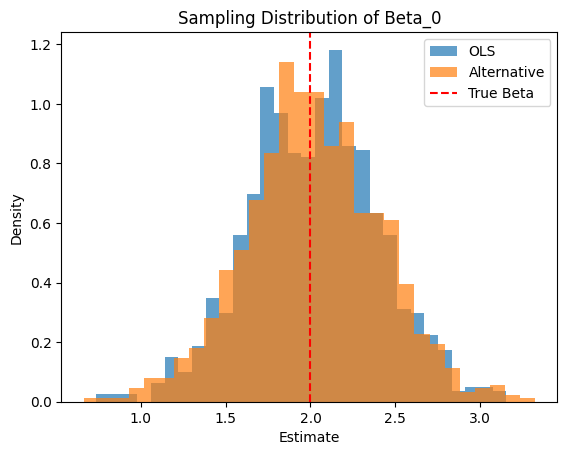

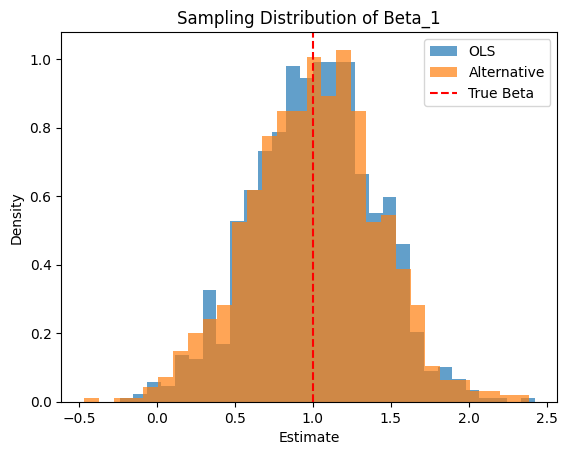

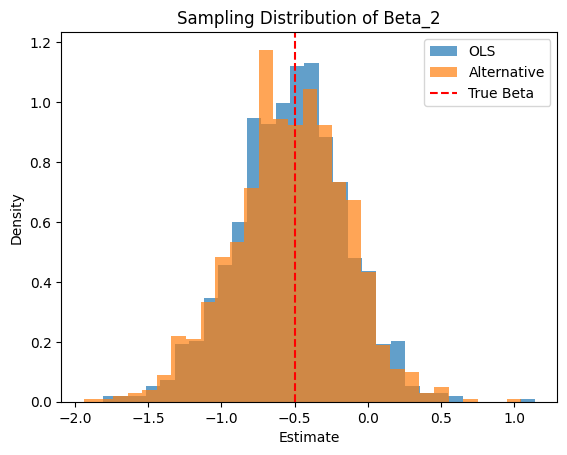

Beta_0:
  OLS Mean: 2.0187, Variance: 0.1462
  Alt Mean: 2.0186, Variance: 0.1564
Beta_1:
  OLS Mean: 1.0098, Variance: 0.1542
  Alt Mean: 1.0075, Variance: 0.1686
Beta_2:
  OLS Mean: -0.5235, Variance: 0.1398
  Alt Mean: -0.5292, Variance: 0.1514


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for DGP
np.random.seed(42)
N = 30  # Number of observations
K = 3   # Number of regressors (including intercept)
beta_true = np.array([2, 1, -0.5])  # True coefficients
sigma = 2  # Standard deviation of errors

# Monte Carlo settings
simulations = 1000  # Number of Monte Carlo iterations

# Function to generate data (DGP)
def generate_data(N, K, beta, sigma):
    X = np.random.randn(N, K)
    X[:, 0] = 1  # Intercept
    epsilon = np.random.normal(0, sigma, N)
    y = X @ beta + epsilon
    return X, y

# OLS estimator
def ols_estimator(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Alternative estimator with weights summing to 1
def alternative_estimator(X, y):
    weights = np.random.uniform(0.5, 1.5, X.shape[0])
    weights /= np.sum(weights)  # Normalize weights to sum to 1
    W = np.diag(weights)  # Create a diagonal weighting matrix
    return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

# Monte Carlo simulation
ols_estimates = []
alt_estimates = []
for _ in range(simulations):
    X, y = generate_data(N, K, beta_true, sigma)
    ols_estimates.append(ols_estimator(X, y))
    alt_estimates.append(alternative_estimator(X, y))

ols_estimates = np.array(ols_estimates)
alt_estimates = np.array(alt_estimates)

# Calculate means and variances
ols_mean = np.mean(ols_estimates, axis=0)
ols_var = np.var(ols_estimates, axis=0)
alt_mean = np.mean(alt_estimates, axis=0)
alt_var = np.var(alt_estimates, axis=0)

# Plot results
for i in range(K):
    plt.figure()
    plt.hist(ols_estimates[:, i], bins=30, alpha=0.7, label="OLS", density=True)
    plt.hist(alt_estimates[:, i], bins=30, alpha=0.7, label="Alternative", density=True)
    plt.axvline(beta_true[i], color='red', linestyle='--', label="True Beta")
    plt.title(f"Sampling Distribution of Beta_{i}")
    plt.xlabel("Estimate")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Print summary
for i in range(K):
    print(f"Beta_{i}:")
    print(f"  OLS Mean: {ols_mean[i]:.4f}, Variance: {ols_var[i]:.4f}")
    print(f"  Alt Mean: {alt_mean[i]:.4f}, Variance: {alt_var[i]:.4f}")


# Variance-Covariance Matrix of OLS Estimates

## Key Points
1. **Definition**:
   - The variance-covariance matrix of OLS estimates is:
     $$
     \text{Var}(\hat{\beta}) = \sigma^2 (X'X)^{-1},
     $$
     where $\sigma^2 = \frac{e'e}{n-k}$ is the estimated error variance.

2. **Diagonal Elements**:
   - The diagonal elements of $\text{Var}(\hat{\beta})$ are the variances of the individual coefficients.

3. **Off-Diagonal Elements**:
   - The off-diagonal elements represent the covariances between different coefficients.

4. **Standard Errors**:
   - Standard errors are computed as:
     $$
     \text{SE}(\hat{\beta}_i) = \sqrt{\text{Var}(\hat{\beta}_i)}.
     $$

## Summary
- Smaller values of $\text{Var}(\hat{\beta})$ indicate more precise estimates.
- The variance-covariance matrix provides a measure of the uncertainty in the OLS estimates.
- Standard errors are derived from the diagonal elements, enabling hypothesis testing.

In [20]:
import numpy as np

# Function to compute OLS estimates
def ols_estimator(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Function to compute variance-covariance matrix of OLS estimates
def variance_covariance_matrix(X, residuals):
    """
    Compute the variance-covariance matrix of OLS estimates.
    Parameters:
        X (numpy array): Design matrix (with intercept).
        residuals (numpy array): Residuals from OLS estimation.
    Returns:
        var_cov_matrix (numpy array): Variance-covariance matrix of OLS estimates.
    """
    n, k = X.shape
    sigma_squared = np.sum(residuals ** 2) / (n - k)  # Estimated variance of errors
    var_cov_matrix = sigma_squared * np.linalg.inv(X.T @ X)
    return var_cov_matrix

# Example usage
np.random.seed(42)
n, k = 100, 2  # Number of observations and independent variables
beta_true = np.array([3, 2, -1])  # True coefficients

# Generate random data
X = np.random.rand(n, k)
X = np.hstack((np.ones((n, 1)), X))  # Add intercept
epsilon = np.random.normal(0, 1, n)  # Random noise
y = X @ beta_true + epsilon

# OLS estimation
beta_hat = ols_estimator(X, y)

# Residuals
residuals = y - X @ beta_hat

# Variance-covariance matrix
var_cov_matrix = variance_covariance_matrix(X, residuals)

# Standard errors
standard_errors = np.sqrt(np.diag(var_cov_matrix))

# Print results
print("OLS Estimates (beta_hat):", beta_hat)
print("Variance-Covariance Matrix:\n", var_cov_matrix)
print("Standard Errors:", standard_errors)


OLS Estimates (beta_hat): [ 2.77227226  2.33866677 -0.64505397]
Variance-Covariance Matrix:
 [[ 0.06736477 -0.05491235 -0.06331449]
 [-0.05491235  0.10966263  0.00443521]
 [-0.06331449  0.00443521  0.12563637]]
Standard Errors: [0.25954723 0.33115349 0.35445221]


# Hypothesis Testing with OLS Estimates

## Key Points
1. **Assumption of Normality**:
   - Under the assumption that $\epsilon \sim N(0, \sigma^2I)$, the OLS estimates $\hat{\beta}$ follow:
     $$
     \hat{\beta} \sim N(\beta, \sigma^2(X'X)^{-1}).
     $$

2. **Standardized Test Statistic**:
   - For a single coefficient $\beta_i$, the test statistic is:
     $$
     t = \frac{\hat{\beta}_i - \beta_i^0}{\text{SE}(\hat{\beta}_i)},
     $$
     where $\beta_i^0$ is the null hypothesis value.

3. **Degrees of Freedom**:
   - The $t$-statistic follows a $t$-distribution with $n-k$ degrees of freedom.

4. **Confidence Intervals**:
   - A $(1-\alpha)$ confidence interval for $\beta_i$ is:
     $$
     \hat{\beta}_i \pm t_{\alpha/2, n-k} \cdot \text{SE}(\hat{\beta}_i),
     $$
     where $t_{\alpha/2, n-k}$ is the critical value from the $t$-distribution.

## Summary
- Hypothesis testing evaluates whether the estimated coefficients are statistically significant.
- Confidence intervals provide a range of plausible values for the true coefficients.
- Normality of errors simplifies hypothesis testing but is not required for the Gauss-Markov theorem.

In [21]:
import numpy as np
import scipy.stats as stats

# Function to compute OLS estimates
def ols_estimator(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Function to compute variance-covariance matrix of OLS estimates
def variance_covariance_matrix(X, residuals):
    n, k = X.shape
    sigma_squared = np.sum(residuals ** 2) / (n - k)  # Estimated variance of errors
    var_cov_matrix = sigma_squared * np.linalg.inv(X.T @ X)
    return var_cov_matrix

# Hypothesis Testing for Coefficients
def hypothesis_test(beta_hat, var_cov_matrix, beta_null, n, k, alpha=0.05):
    standard_errors = np.sqrt(np.diag(var_cov_matrix))
    t_stats = (beta_hat - beta_null) / standard_errors
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n - k))
    critical_value = stats.t.ppf(1 - alpha / 2, df=n - k)
    confidence_intervals = np.array([
        (beta - critical_value * se, beta + critical_value * se)
        for beta, se in zip(beta_hat, standard_errors)
    ])
    return {
        "t_stats": t_stats,
        "p_values": p_values,
        "confidence_intervals": confidence_intervals
    }

# Example Usage
np.random.seed(42)
n, k = 100, 2  # Number of observations and independent variables
beta_true = np.array([3, 2, -1])  # True coefficients

# Generate random data
X = np.random.rand(n, k)
X = np.hstack((np.ones((n, 1)), X))  # Add intercept
epsilon = np.random.normal(0, 1, n)  # Random noise
y = X @ beta_true + epsilon

# OLS estimation
beta_hat = ols_estimator(X, y)

# Residuals and variance-covariance matrix
residuals = y - X @ beta_hat
var_cov_matrix = variance_covariance_matrix(X, residuals)

# Perform hypothesis testing
beta_null = np.zeros_like(beta_hat)  # Null hypothesis: coefficients are 0
results = hypothesis_test(beta_hat, var_cov_matrix, beta_null, n, k + 1)

# Print results
print("OLS Estimates (beta_hat):", beta_hat)
print("t-Statistics:", results["t_stats"])
print("p-Values:", results["p_values"])
print("Confidence Intervals:\n", results["confidence_intervals"])


OLS Estimates (beta_hat): [ 2.77227226  2.33866677 -0.64505397]
t-Statistics: [10.68118591  7.06218365 -1.8198616 ]
p-Values: [0.00000000e+00 2.48513654e-10 7.18643471e-02]
Confidence Intervals:
 [[ 2.25714285  3.28740168]
 [ 1.68141876  2.99591479]
 [-1.34854349  0.05843555]]


# Robust Standard Errors

## Key Points
1. **Definition**:
   - Robust standard errors adjust for heteroskedasticity, where the error variance is not constant:  
     $\text{Var}(\epsilon_i | X) \neq \sigma^2$.

2. **Heteroskedasticity-Consistent Estimator**:
   - White's robust variance-covariance matrix:  
     $\text{Var}(\hat{\beta}) = (X'X)^{-1} X' \widehat{\Omega} X (X'X)^{-1}$,  
     where $\widehat{\Omega} = \text{diag}(e_i^2)$ and $e_i$ are the residuals.

3. **Comparison with OLS Variance**:
   - OLS assumes homoskedasticity:  
     $\text{Var}(\hat{\beta}) = \sigma^2 (X'X)^{-1}$.
   - Robust standard errors do not require this assumption.

4. **Implementation**:
   - Compute residuals $e = y - X\hat{\beta}$.
   - Use $\widehat{\Omega} = \text{diag}(e_i^2)$ to adjust the variance-covariance matrix.

## Summary
- Robust standard errors are useful when heteroskedasticity is suspected.
- They are larger than OLS standard errors if heteroskedasticity is present.
- Hypothesis testing remains valid with robust standard errors.

In [33]:
import numpy as np
import statsmodels.api as sm

# Generate data with heteroskedasticity
def generate_heteroskedastic_data(n, beta, seed=42):
    np.random.seed(seed)
    k = len(beta) - 1  # Number of predictors
    X = np.random.rand(n, k)  # Random predictors
    X = np.hstack((np.ones((n, 1)), X))  # Add intercept
    epsilon = np.random.normal(0, 1, n) * np.sqrt(X[:, 1])  # Heteroskedastic errors
    y = X @ beta + epsilon
    return X, y

# OLS Estimator
def ols_estimator(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Regular Variance-Covariance Matrix
def variance_cov_matrix(X, residuals):
    n, k = X.shape
    sigma_squared = np.sum(residuals ** 2) / (n - k)  # Estimated error variance
    var_cov_matrix = sigma_squared * np.linalg.inv(X.T @ X)
    return var_cov_matrix

# Robust Variance-Covariance Matrix
def robust_variance_cov_matrix(X, residuals):
    omega = np.diag(residuals ** 2)  # Diagonal matrix of squared residuals
    var_cov_matrix = np.linalg.inv(X.T @ X) @ (X.T @ omega @ X) @ np.linalg.inv(X.T @ X)
    return var_cov_matrix

# Parameters
n = 200  # Number of observations
beta_true = np.array([3, 2, -1])  # True coefficients

# Generate data
X, y = generate_heteroskedastic_data(n, beta_true)

# Manually compute OLS estimates
beta_hat = ols_estimator(X, y)

# Compute residuals
residuals = y - X @ beta_hat

# Compute regular and robust variance-covariance matrices
var_cov_regular = variance_cov_matrix(X, residuals)
var_cov_robust = robust_variance_cov_matrix(X, residuals)

# Compute standard errors
regular_se = np.sqrt(np.diag(var_cov_regular))
robust_se = np.sqrt(np.diag(var_cov_robust))

# Compute t-statistics manually
regular_t_stats_manual = beta_hat / regular_se
robust_t_stats_manual = beta_hat / robust_se

# Use statsmodels for comparison
ols_model = sm.OLS(y, X).fit()
robust_model = ols_model.get_robustcov_results(cov_type='HC0')

# Compare results
print("\nManual Regular t-Statistics:", regular_t_stats_manual)
print("Statsmodels Regular t-Statistics:", ols_model.tvalues)
print("\nManual Robust t-Statistics:", robust_t_stats_manual)
print("Statsmodels Robust t-Statistics:", robust_model.tvalues)



Manual Regular t-Statistics: [24.3778848  11.90633416 -6.33914276]
Statsmodels Regular t-Statistics: [24.3778848  11.90633416 -6.33914276]

Manual Robust t-Statistics: [28.18185418 12.79697178 -6.60544943]
Statsmodels Robust t-Statistics: [28.18185418 12.79697178 -6.60544943]


# Heteroskedasticity-Consistent (HC) Standard Errors

## Key Points

1. **Definition**:
   - HC standard errors adjust for heteroskedasticity:  
     $ \text{Var}(\epsilon_i \mid X) \neq \sigma^2 $.

2. **HC Variance Estimators**:
   - **HC0**:  
     $ \widehat{\Omega} = \text{diag}(e_i^2) $ (squared residuals). No additional adjustments.  
     Suitable for large samples.  
   - **HC1**:  
     Adjusts HC0 for degrees of freedom:  
     $ \widehat{\Omega} = \frac{n}{n-k} \cdot \text{diag}(e_i^2) $.  
   - **HC2**:  
     Adjusts residuals by leverage:  
     $ \widehat{\Omega} = \text{diag}\left(\frac{e_i^2}{1-h_i}\right) $, where $ h_i $ is leverage.  
   - **HC3**:  
     Further adjusts residuals:  
     $ \widehat{\Omega} = \text{diag}\left(\frac{e_i^2}{(1-h_i)^2}\right) $. Best for small samples.

3. **Implementation**:
   - Compute residuals $ e = y - X\hat{\beta} $.
   - Use the appropriate $ \widehat{\Omega} $ to adjust the variance-covariance matrix:  
     $ \text{Var}(\hat{\beta}) = (X'X)^{-1} X' \widehat{\Omega} X (X'X)^{-1} $.

## Summary
- **HC0** is simple and efficient for large samples.
- **HC3** is preferred for small samples due to better finite-sample performance.
- All ensure valid inference under heteroskedasticity. 

In [35]:
import numpy as np
import statsmodels.api as sm

# Generate data with heteroskedasticity
def generate_heteroskedastic_data(n, beta, seed=42):
    np.random.seed(seed)
    k = len(beta) - 1  # Number of predictors
    X = np.random.rand(n, k)  # Random predictors
    X = np.hstack((np.ones((n, 1)), X))  # Add intercept
    epsilon = np.random.normal(0, 1, n) * np.sqrt(X[:, 1])  # Heteroskedastic errors
    y = X @ beta + epsilon
    return X, y

# OLS Estimator
def ols_estimator(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Robust Variance-Covariance Matrix
def robust_variance_cov_matrix(X, residuals, type='HC0'):
    n, k = X.shape
    h = np.diag(X @ np.linalg.inv(X.T @ X) @ X.T)  # Leverage values
    if type == 'HC0':
        omega = np.diag(residuals ** 2)
    elif type == 'HC1':
        omega = np.diag(residuals ** 2 * n / (n - k))
    elif type == 'HC2':
        omega = np.diag(residuals ** 2 / (1 - h))
    elif type == 'HC3':
        omega = np.diag(residuals ** 2 / (1 - h) ** 2)
    else:
        raise ValueError("Invalid type. Choose from 'HC0', 'HC1', 'HC2', 'HC3'.")
    return np.linalg.inv(X.T @ X) @ (X.T @ omega @ X) @ np.linalg.inv(X.T @ X)

# Parameters
n = 200  # Number of observations
beta_true = np.array([3, 2, -1])  # True coefficients

# Generate data
X, y = generate_heteroskedastic_data(n, beta_true)

# Manually compute OLS estimates
beta_hat = ols_estimator(X, y)

# Compute residuals
residuals = y - X @ beta_hat

# Compute robust variance-covariance matrices for HC0-HC3
manual_robust_se = {}
for hc_type in ['HC0', 'HC1', 'HC2', 'HC3']:
    var_cov_matrix = robust_variance_cov_matrix(X, residuals, type=hc_type)
    manual_robust_se[hc_type] = np.sqrt(np.diag(var_cov_matrix))

# Use statsmodels for robust standard errors
ols_model = sm.OLS(y, X).fit()
statsmodels_robust_se = {
    'HC0': ols_model.get_robustcov_results(cov_type='HC0').bse,
    'HC1': ols_model.get_robustcov_results(cov_type='HC1').bse,
    'HC2': ols_model.get_robustcov_results(cov_type='HC2').bse,
    'HC3': ols_model.get_robustcov_results(cov_type='HC3').bse,
}

# Compare manual and statsmodels results
for hc_type in ['HC0', 'HC1', 'HC2', 'HC3']:
    print(f"\n{hc_type} Standard Errors:")
    print(f"Manual:      {manual_robust_se[hc_type]}")
    print(f"Statsmodels: {statsmodels_robust_se[hc_type]}")



HC0 Standard Errors:
Manual:      [0.10833793 0.15330688 0.16608516]
Statsmodels: [0.10833793 0.15330688 0.16608516]

HC1 Standard Errors:
Manual:      [0.10915972 0.15446978 0.16734499]
Statsmodels: [0.10915972 0.15446978 0.16734499]

HC2 Standard Errors:
Manual:      [0.10928417 0.15465854 0.16758238]
Statsmodels: [0.10928417 0.15465854 0.16758238]

HC3 Standard Errors:
Manual:      [0.11024077 0.15602436 0.16909592]
Statsmodels: [0.11024077 0.15602436 0.16909592]


# Frisch-Waugh-Lovell (FWL) Theorem Demonstration

## Key Points

1. **Objective**:
   - Demonstrate the equivalence of estimating coefficients using:
     1. A full regression model.
     2. The Frisch-Waugh-Lovell (FWL) theorem for partitioned regression.

2. **Setup**:
   - Partition independent variables into $ X_1 $ (first subset, including intercept) and $ X_2 $ (second subset).  
     The dependent variable $ y $ is generated as:  
     $ y = X_1\beta_1 + X_2\beta_2 + \epsilon $.  

3. **Steps**:

   1. **Full Regression**:
      - Regress $ y $ on $ X = [X_1 \mid X_2] $ to estimate all coefficients $ \beta = [\beta_1, \beta_2] $:  
        $ \beta = (X'X)^{-1}X'y $.

   2. **FWL Partial Regression**:
      - Regress $ y $ on $ X_1 $ to compute residuals:  
        $ M_1 = I - X_1(X_1'X_1)^{-1}X_1' $  
        $ \text{Residuals of } y: M_1y $.
      - Regress each column of $ X_2 $ on $ X_1 $ to compute residuals:  
        $ \text{Residuals of } X_2: M_1X_2 $.
      - Regress residuals of $ y $ on residuals of $ X_2 $ to estimate $ \beta_2 $:  
        $ \beta_2 = (X_2'M_1X_2)^{-1}(X_2'M_1y) $.

4. **Comparison**:
   - Extract $ \beta_2 $ from the full regression model.
   - Compare with $ \beta_2 $ estimated using the FWL theorem to verify equivalence.

## Summary
- The FWL theorem shows that the coefficients for $ \beta_2 $ can be obtained by regressing residuals of $ y $ on residuals of $ X_2 $, after removing the effects of $ X_1 $.
- This is equivalent to estimating $ \beta_2 $ directly using the full model.

In [36]:
import numpy as np
from numpy.linalg import inv

# Generate data for the model: y = X1*beta1 + X2*beta2 + epsilon
np.random.seed(42)
n = 100  # Number of observations
p1 = 2   # Number of variables in X1
p2 = 2   # Number of variables in X2

# Generate independent variables
X1 = np.random.randn(n, p1)
X2 = np.random.randn(n, p2)

# True coefficients
beta1_true = np.array([1, -1])
beta2_true = np.array([2, 0.5])

# Generate y
epsilon = np.random.randn(n)
y = X1 @ beta1_true + X2 @ beta2_true + epsilon

# Add intercept to X1
X1 = np.hstack((np.ones((n, 1)), X1))

# Full model: X = [X1 | X2]
X = np.hstack((X1, X2))

# Step 1: Full regression to get all coefficients
beta_full = inv(X.T @ X) @ X.T @ y

# Step 2: Partial regression using FWL
# Step 2.1: Regress y on X1, get residuals
M1 = np.eye(n) - X1 @ inv(X1.T @ X1) @ X1.T  # Residual maker matrix
residual_y = M1 @ y

# Step 2.2: Regress each column of X2 on X1, get residuals
residual_X2 = M1 @ X2

# Step 2.3: Regress residual_y on residual_X2
beta2_fwl = inv(residual_X2.T @ residual_X2) @ residual_X2.T @ residual_y

# Print results
print("Full Model Coefficients (beta):", beta_full)
print("FWL Coefficients for beta2:", beta2_fwl)
print("True beta2:", beta2_true)

# Verify equivalence of beta2 estimates
beta2_full = beta_full[-p2:]  # Extract beta2 from full model
print("Beta2 from Full Model:", beta2_full)
print("Beta2 from FWL Theorem:", beta2_fwl)
print("Are beta2 estimates equivalent? ", np.allclose(beta2_full, beta2_fwl))


Full Model Coefficients (beta): [-0.02094136  1.18181028 -0.95662244  1.92128137  0.37507747]
FWL Coefficients for beta2: [1.92128137 0.37507747]
True beta2: [2.  0.5]
Beta2 from Full Model: [1.92128137 0.37507747]
Beta2 from FWL Theorem: [1.92128137 0.37507747]
Are beta2 estimates equivalent?  True


# Omitted Variable Bias Demonstration

## Key Points

1. **Objective**:
   - Understand how omitting variables from a regression affects the estimated coefficients of included variables.
   - Demonstrate how bias in estimated coefficients arises when correlated variables are omitted.

2. **Setup**:
   - The true model is:
     \[
     y = X_1\beta_1 + X_2\beta_2 + \epsilon
     \]
     - $X_1$: Included independent variable.
     - $X_2$: Omitted independent variable, correlated with $X_1$.
     - $\epsilon$: Random error term with zero mean.
   - If $X_2$ is omitted, the estimated model becomes:
     \[
     y = X_1\hat{\beta}_1 + e
     \]

3. **Steps**:

   1. **True Model**:
      - Regress $ y $ on $ X_1 $ and $ X_2 $ to obtain unbiased estimates for $\beta_1$ and $\beta_2$.

   2. **Omitting $X_2$**:
      - Regress $ y $ on $ X_1 $ only, ignoring the effects of $ X_2 $.
      - The estimated $\hat{\beta}_1$ is biased due to the omitted $X_2$.

   3. **Bias Formula**:
      - The omitted variable bias in $\hat{\beta}_1$ is given by:
        \[
        \text{Bias}(\hat{\beta}_1) = (X_1'X_1)^{-1}X_1'X_2\beta_2
        \]
        - The bias depends on:
          1. The correlation between $X_1$ and $X_2$ ($X_1'X_2$).
          2. The magnitude of $\beta_2$ (the strength of $X_2$'s effect).

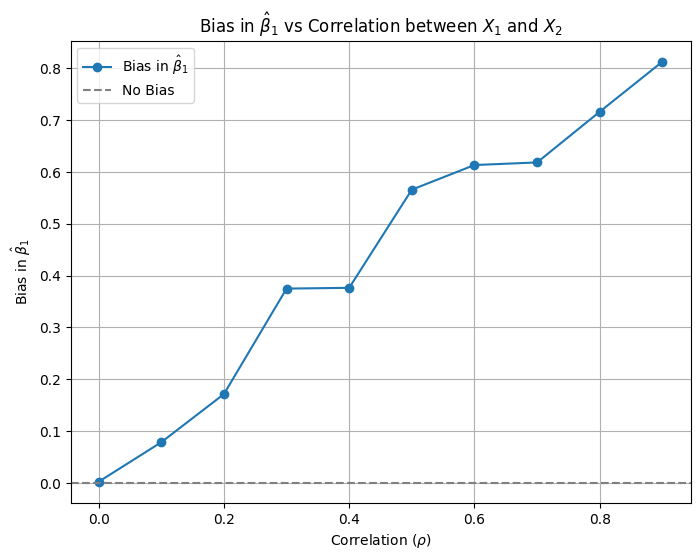

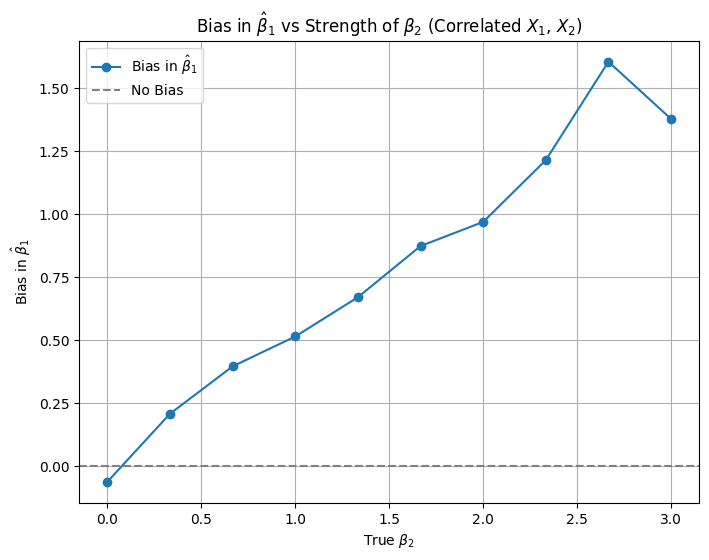

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
np.random.seed(42)
n = 500  # Number of observations
beta1 = 2  # True coefficient for X1
beta2 = 1  # True coefficient for X2

# Common error term
epsilon = np.random.randn(n)

# 1. Effect of Correlation Between X1 and X2
correlations = np.linspace(0, 0.9, 10)  # Range of correlations
bias_by_correlation = []

for rho in correlations:
    # Generate X1 and X2 with correlation rho
    X1 = np.random.randn(n)
    X2 = rho * X1 + np.sqrt(1 - rho**2) * np.random.randn(n)
    
    # Generate y
    y = beta1 * X1 + beta2 * X2 + epsilon
    
    # Omit X2 and regress y on X1 only
    X1_design = np.vstack((np.ones(n), X1)).T  # Add intercept
    beta_hat = np.linalg.inv(X1_design.T @ X1_design) @ X1_design.T @ y
    
    # Store the bias in beta1 estimate
    bias_by_correlation.append(beta_hat[1] - beta1)

# Plot results for correlation effect
plt.figure(figsize=(8, 6))
plt.plot(correlations, bias_by_correlation, marker='o', label=r'Bias in $\hat{\beta}_1$')
plt.axhline(0, color='gray', linestyle='--', label='No Bias')
plt.title(r"Bias in $\hat{\beta}_1$ vs Correlation between $X_1$ and $X_2$")
plt.xlabel(r"Correlation ($\rho$)")
plt.ylabel(r"Bias in $\hat{\beta}_1$")
plt.legend()
plt.grid()
plt.show()

# 2. Effect of Varying Strength of Beta2 (with correlation)
beta2_values = np.linspace(0, 3, 10)  # Range of beta2 values
bias_by_beta2 = []

for beta2_sim in beta2_values:
    # Generate X1 and correlated X2
    X1 = np.random.randn(n)
    X2 = 0.5 * X1 + np.sqrt(1 - 0.5**2) * np.random.randn(n)  # Correlated with X1
    
    # Generate y
    y = beta1 * X1 + beta2_sim * X2 + epsilon
    
    # Omit X2 and regress y on X1 only
    X1_design = np.vstack((np.ones(n), X1)).T  # Add intercept
    beta_hat = np.linalg.inv(X1_design.T @ X1_design) @ X1_design.T @ y
    
    # Store the bias in beta1 estimate
    bias_by_beta2.append(beta_hat[1] - beta1)

# Plot results for beta2 effect
plt.figure(figsize=(8, 6))
plt.plot(beta2_values, bias_by_beta2, marker='o', label=r'Bias in $\hat{\beta}_1$')
plt.axhline(0, color='gray', linestyle='--', label='No Bias')
plt.title(r"Bias in $\hat{\beta}_1$ vs Strength of $\beta_2$ (Correlated $X_1$, $X_2$)")
plt.xlabel(r"True $\beta_2$")
plt.ylabel(r"Bias in $\hat{\beta}_1$")
plt.legend()
plt.grid()
plt.show()
